In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("C:/Users/dhckd/Study/CodingWorld/Codestates/Projects/project1/dataset/new_data.csv", index_col = 0)

### 3. 출고량이 높은 게임에 대한 분석 및 시각화

- 출고량이 높은 기준을 정하자: 중앙값 이상? 혹인 평균값 이상? 매출액데이터가 없는게 아쉽다.

1) 연도별로 게임 시장의 규모가 다르다. 그렇기에 '연도별'로 높은 출고량을 보고, 해당 게임들의 주류 장르가 무엇인지 살펴보자

2) 장르별로 출고량이 평균 혹은 중앙값 이상인 게임들의 특징을 찾아볼까? 그런데 특징이라고 할 것이 데이터 내에 있나? 플랫폼을 봐야할 것 같다.

In [4]:
df_new = df.copy()
# year가 sum에 집계되는걸 방지하기 위해 잠시 str로 형변환
df_new = df_new.astype({'Year':'int'})
df_new = df_new.astype({'Year':'str'})
df_new['RowSum'] = df_new.sum(axis=1)

In [5]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,RowSum
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


- 연도별로 높은 출고량을 보인 게임들을 찾기 위해, 연도별로 나눠서 보자

In [6]:
df_new = df_new.astype({'Year':'int'})

- 연도별 평균 출고량 이상인 게임들 필터링하기 위한 함수
#### * 주의할 점: 전처리 등을 거쳐 2018년도, 2019년도는 데이터가 없음

In [7]:
def popular_game(year):
    # 해당 연도 게임들만 가져와서 df_temp에 저장
    condition = df_new.Year == year
    df_temp = df_new.loc[condition]
    
    # 해당 연도 평균 출고량
    m = df_temp['RowSum'].mean()
    # 해당 연도 평균 출고량 이상 게임 필터링
    condition2 = df_temp.RowSum >= m
    df_temp = df_temp.loc[condition2]
    return df_temp

In [8]:
df_newnew = pd.DataFrame()
for year in range(1980, 2021):
    df_newnew = pd.concat([df_newnew, popular_game(year)])

In [9]:
df_newnew

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,RowSum
5724,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
15013,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
5321,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,110000.00,0.00,0.02,110001.86
1433,Moon Patrol,2600,1982,Shooter,Atari,1.05,0.06,0.00,0.01,1.12
3553,Joust,2600,1982,Platform,Atari,1.01,0.06,0.00,0.01,1.08
...,...,...,...,...,...,...,...,...,...,...
9400,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,Nippon Ichi Software,0.06,30000.00,0.07,0.02,30000.15
15062,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0.00,0.00,20000.00,0.00,20000.00
15482,FIFA 17,PS4,2016,Sports,Electronic Arts,280000.00,3.75,0.06,0.69,280004.50
10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


### - 위와같이 499개의 게임 데이터가 추려졌다. 이 게임들은 해당 연도의 평균 출고량보다 많이 출고된 게임이며, 이들을 확인하여 해당 연도의 특징을 살펴볼 수 있을 것이다.

In [10]:
df_newnew.Platform.unique()

array(['2600', 'NES', 'SNES', 'PC', 'GEN', 'GB', 'SCD', 'SAT', 'PS',
       'N64', 'PS2', 'GC', 'XB', 'GBA', 'DS', 'PSP', 'X360', 'Wii', 'PS3',
       '3DS', 'PSV', 'WiiU', 'XOne', 'PS4'], dtype=object)

- 연도별 주 장르
- 연도별 주 플랫폼

In [11]:
# 해당 년도의 주류 게임장르를 찾는 함수. 가장 빈번한 장르의 게임과 가장 많이 출고된 게임장르
def main_stream(year, df_newnew): 
    # 해당 연도 게임들만 가져와서 df_temp에 저장
    condition = df_newnew.Year == year
    df_temp = df_newnew.loc[condition]
    
    if df_temp.empty:
        return "값이 없습니다."
    else:
        # 최빈값 구하기(가장 빈번한 장르)
        mode = df_temp['Genre'].mode()[0]
        return mode

# 해당 년도의 베스트셀러 게임 찾는 함수
def best_sales(year, df_newnew):
    # 해당 연도 게임들만 가져와서 df_temp에 저장
    condition = df_newnew.Year == year
    df_temp = df_newnew.loc[condition]
    
    if df_temp.empty:
        return "값이 없습니다."
    else:
        # RowSum이 가장 높은 데이터 고르기
        best = df_temp.loc[df_temp['RowSum'] == df_temp.RowSum.max()]
        best = list(best.Genre)[0]
        return best

In [12]:
# 데이터프레임 만들기
df_stream_best = pd.DataFrame()
for year in range(1980, 2021):
    y = [main_stream(year, df_newnew), best_sales(year, df_newnew)]
    df_stream_best[year] = y

df_stream_best.index = ['Main_Stream', 'Best_sales']

In [13]:
df_stream_best

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Main_Stream,Shooter,Action,Platform,Platform,Racing,Platform,Action,Fighting,Platform,Puzzle,...,Action,Action,Role-Playing,Fighting,Action,Shooter,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation
Best_sales,Shooter,Action,Puzzle,Sports,Shooter,Platform,Action,Adventure,Platform,Puzzle,...,Shooter,Action,Action,Shooter,Platform,Sports,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation


In [14]:
# 주류 장르와 베스트 장르가 서로 다른 경우 찾기
df_same = pd.DataFrame() # 서로 같은 경우
df_diff = pd.DataFrame() # 서로 다른 경우
for i in range(41):
    if (df_stream_best.iloc[0, i] == df_stream_best.iloc[1, i]):
        df_same = pd.concat([df_same, df_stream_best.iloc[:, [i]]], axis = 1)
    else:
        df_diff = pd.concat([df_diff, df_stream_best.iloc[:, [i]]], axis = 1)

In [15]:
df_same

,1980,1981,1985,1986,1988,1989,1990,1993,1994,1997,1999,2007,2008,2012,2017,2018,2019,2020
Main_Stream,Shooter,Action,Platform,Action,Platform,Puzzle,Platform,Platform,Fighting,Simulation,Racing,Misc,Action,Action,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation
Best_sales,Shooter,Action,Platform,Action,Platform,Puzzle,Platform,Platform,Fighting,Simulation,Racing,Misc,Action,Action,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation


In [16]:
df_diff

,1982,1983,1984,1987,1991,1992,1995,1996,1998,2000,...,2004,2005,2006,2009,2010,2011,2013,2014,2015,2016
Main_Stream,Platform,Platform,Racing,Fighting,Misc,Fighting,Simulation,Action,Adventure,Platform,...,Sports,Action,Action,Action,Misc,Action,Role-Playing,Fighting,Action,Shooter
Best_sales,Puzzle,Sports,Shooter,Adventure,Simulation,Adventure,Fighting,Racing,Action,Role-Playing,...,Role-Playing,Racing,Simulation,Role-Playing,Shooter,Shooter,Action,Shooter,Platform,Sports


### 주류를 이루는 장르가 아닌 장르가 가장 많은 출고량을 보인 년도를 중점적으로 살펴보고 특징들을 보았다. (df_diff)
- 해당 년도를 따로 추출해보자

- df_diff 기준으로 해당 년도를 df_newnew에서 추출

In [17]:
condition = df_newnew['Year'].isin(list(df_diff.columns))
df_diff_temp = df_newnew.loc[condition]

In [18]:
df_diff_temp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,RowSum
1433,Moon Patrol,2600,1982,Shooter,Atari,1.05,0.06,0.00,0.01,1.12
3553,Joust,2600,1982,Platform,Atari,1.01,0.06,0.00,0.01,1.08
3911,Dig Dug,2600,1982,Puzzle,Atari,1.52,0.10,0.00,0.02,1.64
5821,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
6522,Enduro,2600,1982,Misc,Quelle,0.81,0.05,0.00,0.01,0.87
...,...,...,...,...,...,...,...,...,...,...
3519,Battleborn,PS4,2016,Shooter,Take-Two Interactive,0.09,0.08,0.01,40000.00,40000.18
8950,Touhou Genso Rondo: Bullet Ballet,PS4,2016,Shooter,Nippon Ichi Software,10000.00,0.00,0.00,0.00,10000.00
9400,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,Nippon Ichi Software,0.06,30000.00,0.07,0.02,30000.15
15062,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0.00,0.00,20000.00,0.00,20000.00


----------------------------------------------------------

----------------------------------------------------------

----------------------------------------------------------

## 여기부터 상위 10퍼 게임들. 위에는 평균이상 게임들

In [112]:
# 각 연도별 상위 10퍼센트 출고량을 보인 게임들
def popular_game_10percent(year):
    # 해당 연도 게임들만 가져와서 df_temp에 저장
    condition = df_new.Year == year
    df_temp = df_new.loc[condition]
    
    # 해당 연도 평균 출고량
    Q = df_temp['RowSum'].quantile(.999)
    # 해당 연도 평균 출고량 이상 게임 필터링
    condition2 = df_temp.RowSum >= Q
    df_temp = df_temp.loc[condition2]
    return df_temp

In [113]:
df_10new = pd.DataFrame()
for year in range(1980, 2021):
    df_10new = pd.concat([df_10new, popular_game_10percent(year)])

In [114]:
df_10new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,RowSum
5724,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
5321,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,110000.00,0.00,0.02,110001.86
5821,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
467,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13711,Ice Climber,NES,1985,Platform,Nintendo,460000.00,0.10,0.92,0.02,460001.04
10792,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.50
9998,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
7495,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,190000.00,190007.27
6087,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,60000.00,0.00,0.00,0.00,60000.00


In [115]:
# 총 12개의 장르. 이 12개를 기준으로 그룹화
# 필터링을 활용해서 데이터 나눔
filter1 = df_10new.Genre == 'Action'
df_action = df_10new.loc[filter1]

filter2 = df_10new.Genre == 'Sports'
df_sports = df_10new.loc[filter2]

filter3 = df_10new.Genre == 'Misc'
df_misc = df_10new.loc[filter3]

filter4 = df_10new.Genre == 'Role-Playing'
df_roleplaying = df_10new.loc[filter4]

filter5 = df_10new.Genre == 'Shooter'
df_shooter = df_10new.loc[filter5]

filter6 = df_10new.Genre == 'Adventure'
df_adventure = df_10new.loc[filter6]

filter7 = df_10new.Genre == 'Racing'
df_racing = df_10new.loc[filter7]

filter8 = df_10new.Genre == 'Platform'
df_platform = df_10new.loc[filter8]

filter9 = df_10new.Genre == 'Simulation'
df_simulation = df_10new.loc[filter9]

filter10 = df_10new.Genre == 'Fighting'
df_fighting = df_10new.loc[filter10]

filter11 = df_10new.Genre == 'Strategy'
df_strategy = df_10new.loc[filter11]

filter12 = df_10new.Genre == 'Puzzle'
df_puzzle = df_10new.loc[filter12]

### 파이그래프로 비율 한번 보자

In [116]:
len(df_action)

7

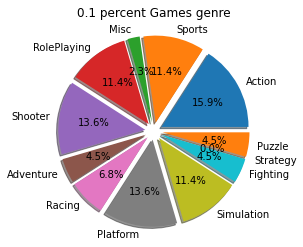

In [118]:
labels =  ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
result = [len(df_action), len(df_sports), len(df_misc), len(df_roleplaying), len(df_shooter), len(df_adventure), len(df_racing), len(df_platform), len(df_simulation), len(df_fighting), len(df_strategy), len(df_puzzle)]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(result, explode = explode, labels = labels, autopct = '%.1f%%', shadow = True)
plt.title('0.1 percent Games genre')
plt.show()

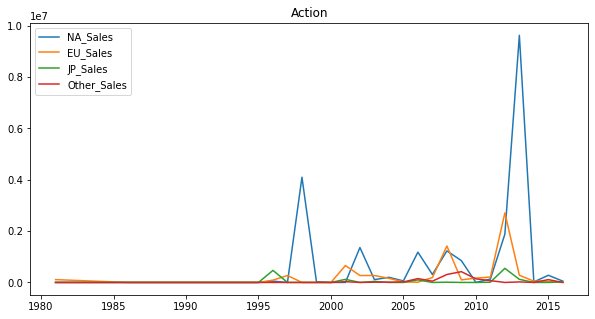

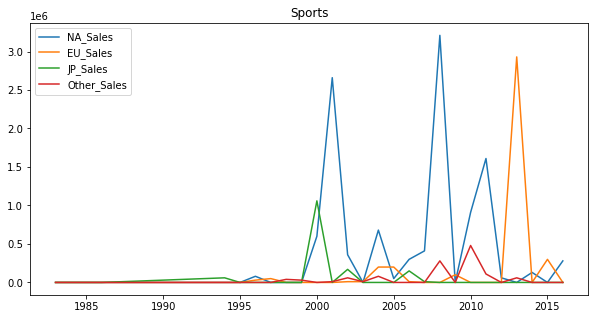

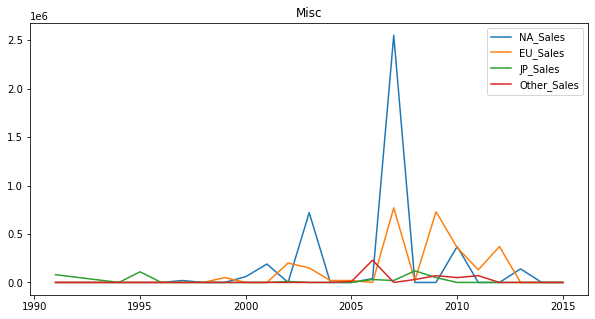

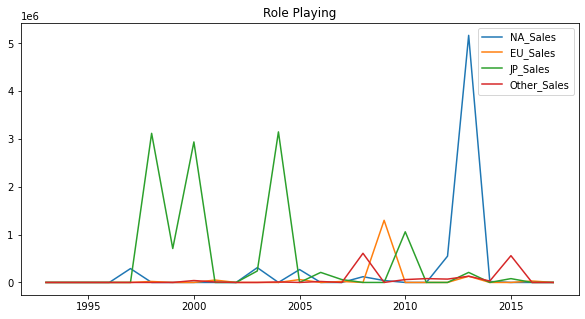

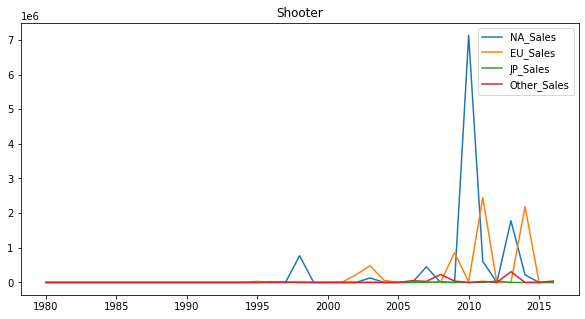

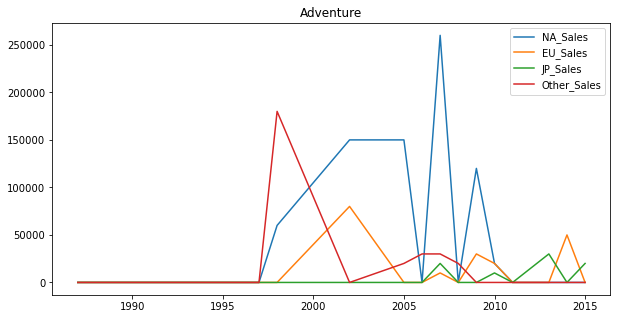

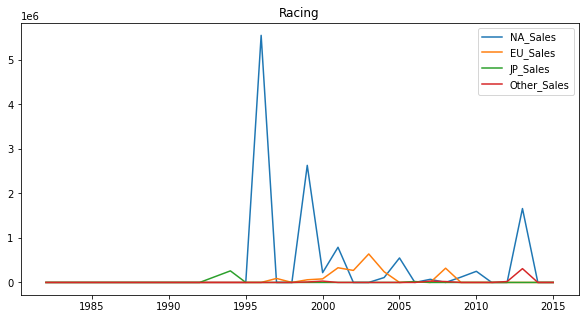

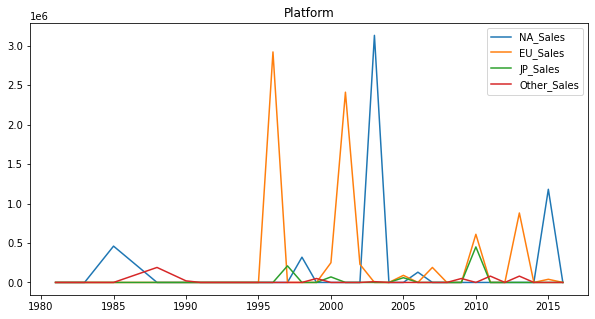

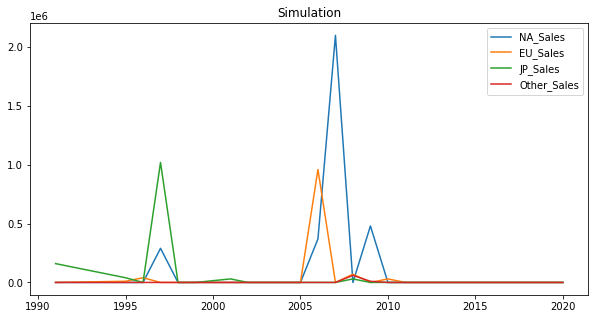

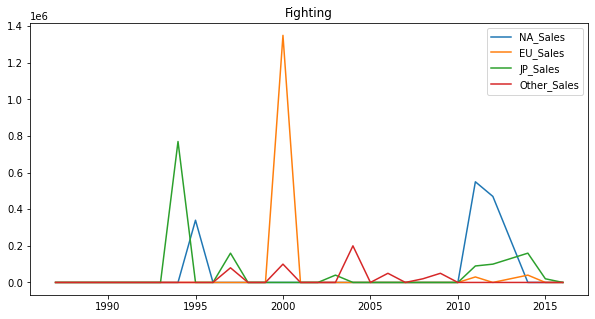

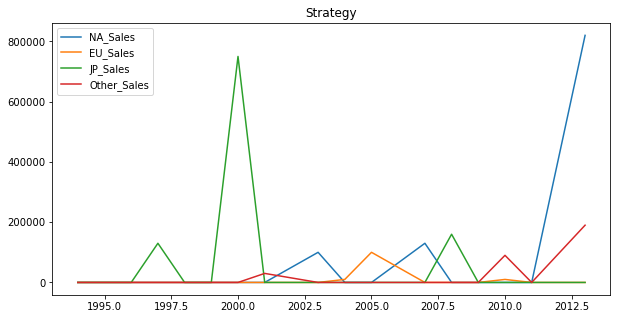

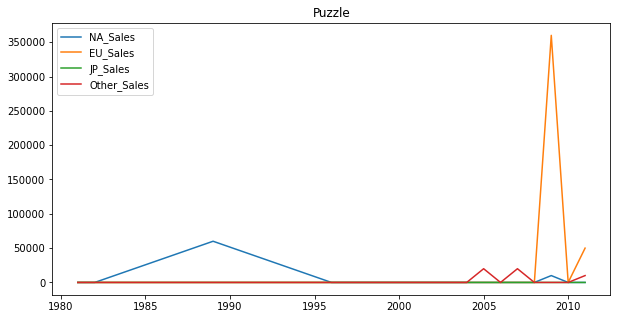

In [55]:
## Action
df_action_new = df_action.sort_values('Year')
# Action 장르에서 연도별 group by
action_grouped = df_action_new.groupby(df_action_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(action_grouped.index, action_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(action_grouped.index, action_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(action_grouped.index, action_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(action_grouped.index, action_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Action')
plt.show()

## sports
df_sports_new = df_sports.sort_values('Year')
# sports 장르에서 연도별 group by
sports_grouped = df_sports_new.groupby(df_sports_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(sports_grouped.index, sports_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(sports_grouped.index, sports_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(sports_grouped.index, sports_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(sports_grouped.index, sports_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Sports')
plt.show()


## Misc
df_misc_new = df_misc.sort_values('Year')
# Misc 장르에서 연도별 group by
misc_grouped = df_misc_new.groupby(df_misc_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(misc_grouped.index, misc_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(misc_grouped.index, misc_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(misc_grouped.index, misc_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(misc_grouped.index, misc_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Misc')
plt.show()


## Role Playing
df_roleplaying_new = df_roleplaying.sort_values('Year')
# Role Playing 장르에서 연도별 group by
roleplaying_grouped = df_roleplaying_new.groupby(df_roleplaying_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(roleplaying_grouped.index, roleplaying_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Role Playing')
plt.show()


## shooter
df_shooter_new = df_shooter.sort_values('Year')
# shooter 장르에서 연도별 group by
shooter_grouped = df_shooter_new.groupby(df_shooter_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(shooter_grouped.index, shooter_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Shooter')
plt.show()


## adventure
df_adventure_new = df_adventure.sort_values('Year')
# adventure 장르에서 연도별 group by
adventure_grouped = df_adventure_new.groupby(df_adventure_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(adventure_grouped.index, adventure_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Adventure')
plt.show()


## racing
df_racing_new = df_racing.sort_values('Year')
# racing 장르에서 연도별 group by
racing_grouped = df_racing_new.groupby(df_racing_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(racing_grouped.index, racing_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(racing_grouped.index, racing_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(racing_grouped.index, racing_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(racing_grouped.index, racing_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Racing')
plt.show()


## platform
df_platform_new = df_platform.sort_values('Year')
# platform 장르에서 연도별 group by
platform_grouped = df_platform_new.groupby(df_platform_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(platform_grouped.index, platform_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(platform_grouped.index, platform_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(platform_grouped.index, platform_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(platform_grouped.index, platform_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Platform')
plt.show()


## simulation
df_simulation_new = df_simulation.sort_values('Year')
# simulation 장르에서 연도별 group by
simulation_grouped = df_simulation_new.groupby(df_simulation_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(simulation_grouped.index, simulation_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Simulation')
plt.show()


## fighting
df_fighting_new = df_fighting.sort_values('Year')
# fighting 장르에서 연도별 group by
fighting_grouped = df_fighting_new.groupby(df_fighting_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(fighting_grouped.index, fighting_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Fighting')
plt.show()


## strategy
df_strategy_new = df_strategy.sort_values('Year')
# strategy 장르에서 연도별 group by
strategy_grouped = df_strategy_new.groupby(df_strategy_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(strategy_grouped.index, strategy_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Strategy')
plt.show()


## puzzle
df_puzzle_new = df_puzzle.sort_values('Year')
# puzzle 장르에서 연도별 group by
puzzle_grouped = df_puzzle_new.groupby(df_puzzle_new['Year']).sum()

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

ax.plot(puzzle_grouped.index, puzzle_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Puzzle')
plt.show()

----------------------------------------------------------

----------------------------------------------------------

### best와 stream이 차이를 보이는 경우

In [22]:
# 데이터프레임 만들기
df_stream_best_10per = pd.DataFrame()
for year in range(1980, 2021):
    y = [main_stream(year, df_10new), best_sales(year, df_10new)]
    df_stream_best_10per[year] = y

df_stream_best_10per.index = ['Main_Stream', 'Best_sales']

In [23]:
df_stream_best_10per

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Main_Stream,Shooter,Action,Puzzle,Platform,Racing,Platform,Action,Adventure,Platform,Puzzle,...,Action,Action,Action,Action,Action,Action,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation
Best_sales,Shooter,Action,Puzzle,Sports,Shooter,Platform,Action,Adventure,Platform,Puzzle,...,Shooter,Action,Action,Shooter,Platform,Sports,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation


### 인기있는 장르와 베스트 장르가 차이를 보이는 년도 구한 뒤, 해당 년도의 특징을 파악해볼 것

In [24]:
# 주류 장르와 베스트 장르가 서로 다른 경우 찾기
df_same = pd.DataFrame() # 서로 같은 경우
df_diff = pd.DataFrame() # 서로 다른 경우
for i in range(41):
    if (df_stream_best_10per.iloc[0, i] == df_stream_best_10per.iloc[1, i]):
        df_same = pd.concat([df_same, df_stream_best_10per.iloc[:, [i]]], axis = 1)
    else:
        df_diff = pd.concat([df_diff, df_stream_best_10per.iloc[:, [i]]], axis = 1)

In [25]:
df_same

,1980,1981,1982,1985,1986,1987,1988,1989,1990,1991,...,1999,2002,2007,2008,2012,2013,2017,2018,2019,2020
Main_Stream,Shooter,Action,Puzzle,Platform,Action,Adventure,Platform,Puzzle,Platform,Simulation,...,Racing,Action,Misc,Action,Action,Action,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation
Best_sales,Shooter,Action,Puzzle,Platform,Action,Adventure,Platform,Puzzle,Platform,Simulation,...,Racing,Action,Misc,Action,Action,Action,Role-Playing,값이 없습니다.,값이 없습니다.,Simulation


In [26]:
df_diff

,1983,1984,1992,1993,1994,1995,1996,1997,2000,2001,2003,2004,2005,2006,2009,2010,2011,2014,2015,2016
Main_Stream,Platform,Racing,Platform,Fighting,Platform,Platform,Action,Platform,Platform,Platform,Action,Sports,Action,Action,Action,Action,Action,Action,Action,Action
Best_sales,Sports,Shooter,Adventure,Platform,Fighting,Fighting,Racing,Simulation,Role-Playing,Sports,Platform,Role-Playing,Racing,Simulation,Role-Playing,Shooter,Shooter,Shooter,Platform,Sports


### df_diff에서 추려진 년도에 해당하는 데이터만 df_10new에서 가져옴
- 아래 데이터는 상위 10퍼센트의 출고량을 보인 게임들 중 인기장르와 베스트셀링 장르가 다른 경우들이다.

In [27]:
condition = df_10new['Year'].isin(list(df_diff.columns))
df_diff_temp = df_10new.loc[condition]

In [28]:
df_diff_temp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,RowSum
467,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
10082,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
6636,Excitebike,NES,1984,Racing,Nintendo,2.04,0.48,1.57,0.07,4.16
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5041,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4.47,1.20,0.16,0.19,6.02
...,...,...,...,...,...,...,...,...,...,...
15482,FIFA 17,PS4,2016,Sports,Electronic Arts,280000.00,3.75,0.06,0.69,280004.50
15805,NBA 2K17,PS4,2016,Sports,Take-Two Interactive,0.83,0.14,0.00,0.22,1.19
16063,Madden NFL 17,PS4,2016,Sports,Electronic Arts,0.92,0.08,0.00,0.23,1.23
16338,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53


In [29]:
# 총 12개의 장르. 이 12개를 기준으로 그룹화
# 필터링을 활용해서 데이터 나눔
filter1 = df_diff_temp.Genre == 'Action'
df_action = df_diff_temp.loc[filter1]

filter2 = df_diff_temp.Genre == 'Sports'
df_sports = df_diff_temp.loc[filter2]

filter3 = df_diff_temp.Genre == 'Misc'
df_misc = df_diff_temp.loc[filter3]

filter4 = df_diff_temp.Genre == 'Role-Playing'
df_roleplaying = df_diff_temp.loc[filter4]

filter5 = df_diff_temp.Genre == 'Shooter'
df_shooter = df_diff_temp.loc[filter5]

filter6 = df_diff_temp.Genre == 'Adventure'
df_adventure = df_diff_temp.loc[filter6]

filter7 = df_diff_temp.Genre == 'Racing'
df_racing = df_diff_temp.loc[filter7]

filter8 = df_diff_temp.Genre == 'Platform'
df_platform = df_diff_temp.loc[filter8]

filter9 = df_diff_temp.Genre == 'Simulation'
df_simulation = df_diff_temp.loc[filter9]

filter10 = df_diff_temp.Genre == 'Fighting'
df_fighting = df_diff_temp.loc[filter10]

filter11 = df_diff_temp.Genre == 'Strategy'
df_strategy = df_diff_temp.loc[filter11]

filter12 = df_diff_temp.Genre == 'Puzzle'
df_puzzle = df_diff_temp.loc[filter12]

### 각 장르의 연도별 출고량

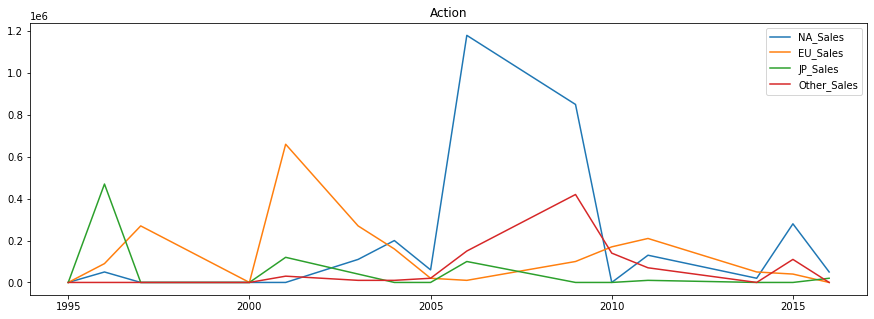

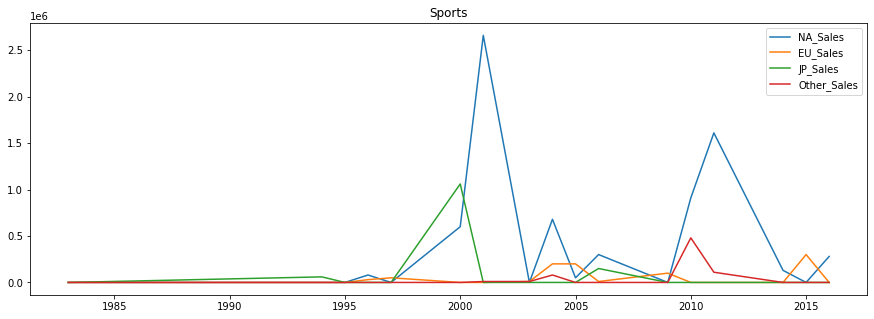

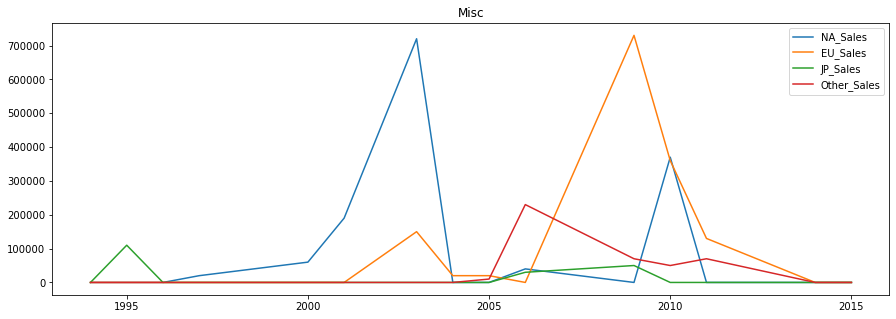

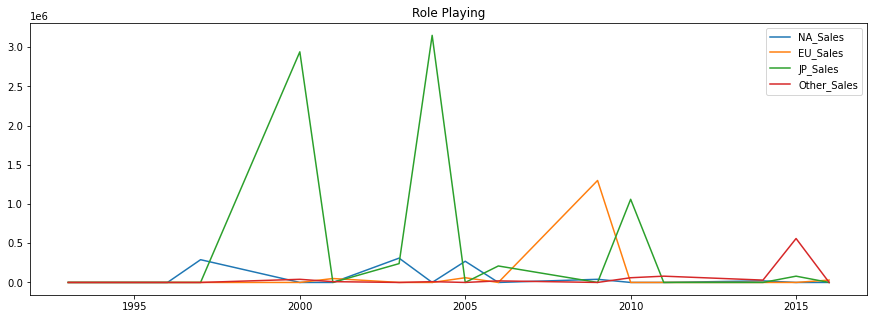

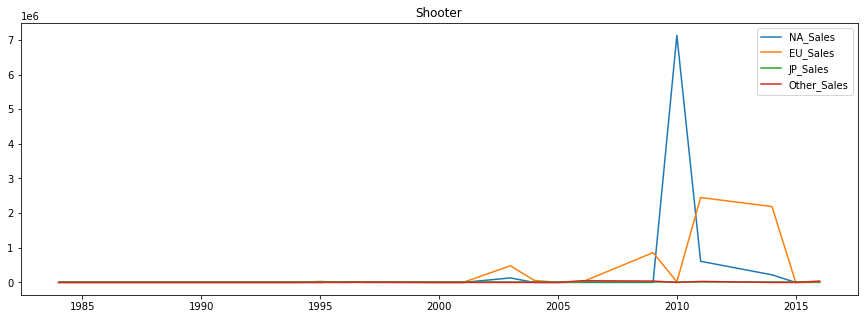

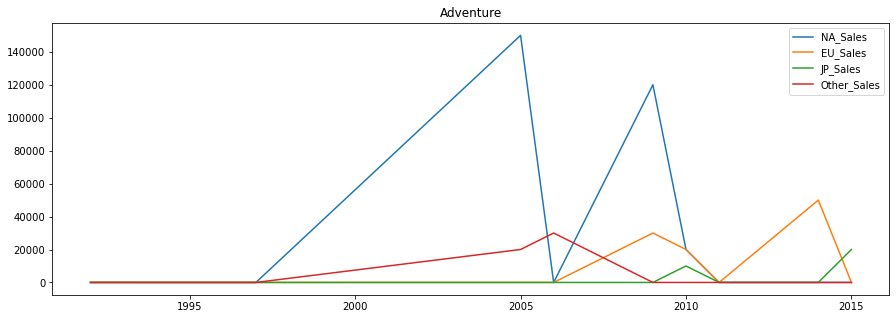

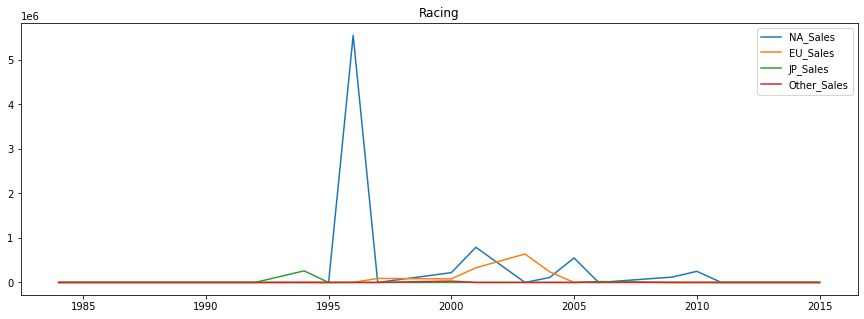

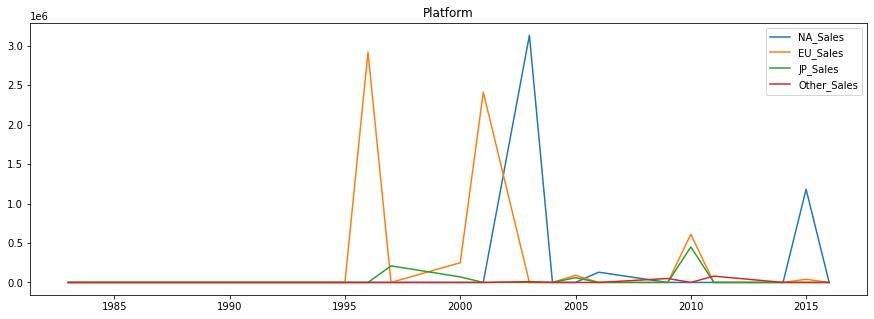

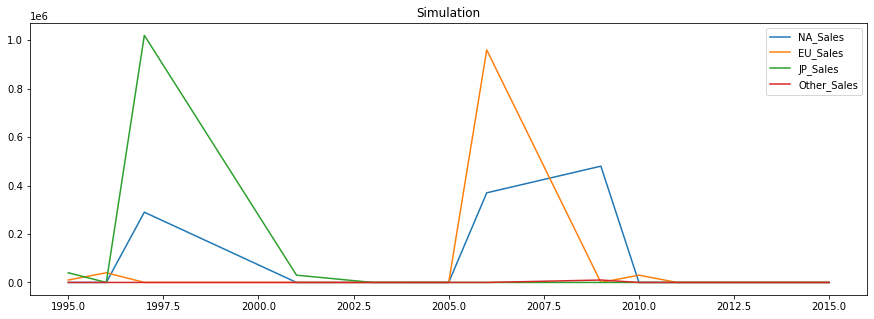

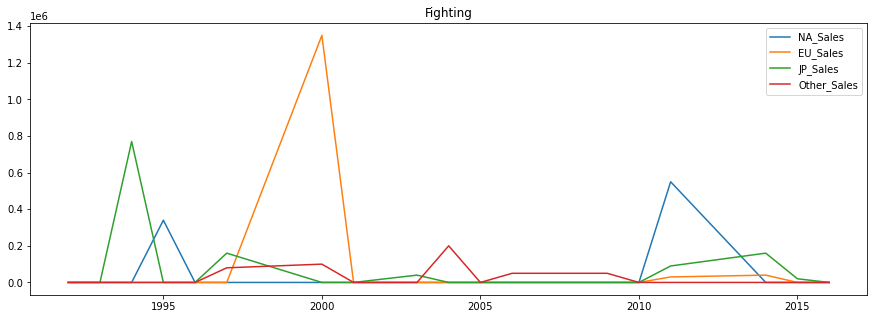

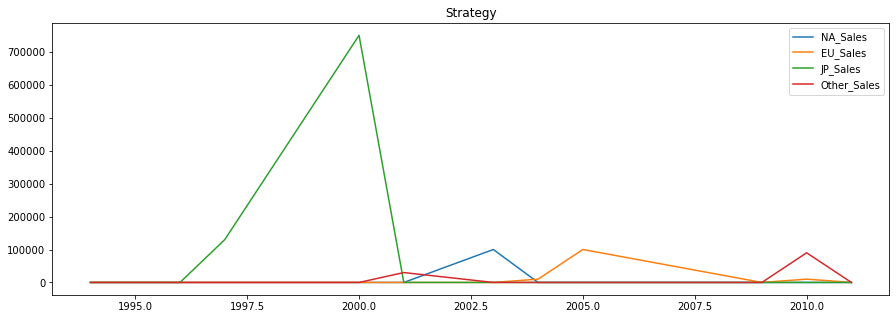

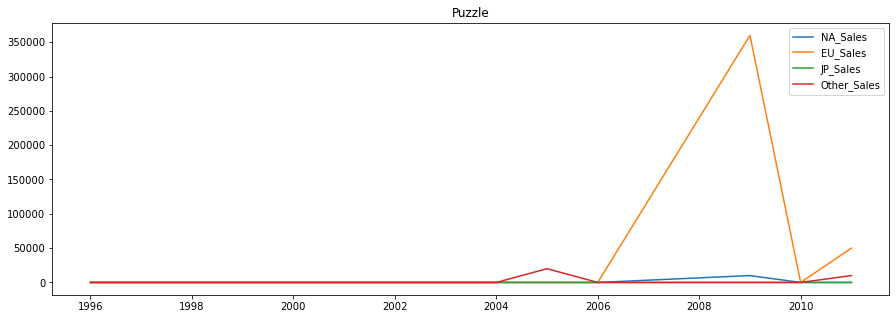

In [32]:
## Action
df_action_new = df_action.sort_values('Year')
# Action 장르에서 연도별 group by
action_grouped = df_action_new.groupby(df_action_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(action_grouped.index, action_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(action_grouped.index, action_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(action_grouped.index, action_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(action_grouped.index, action_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Action')
plt.show()

## sports
df_sports_new = df_sports.sort_values('Year')
# sports 장르에서 연도별 group by
sports_grouped = df_sports_new.groupby(df_sports_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(sports_grouped.index, sports_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(sports_grouped.index, sports_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(sports_grouped.index, sports_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(sports_grouped.index, sports_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Sports')
plt.show()


## Misc
df_misc_new = df_misc.sort_values('Year')
# Misc 장르에서 연도별 group by
misc_grouped = df_misc_new.groupby(df_misc_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(misc_grouped.index, misc_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(misc_grouped.index, misc_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(misc_grouped.index, misc_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(misc_grouped.index, misc_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Misc')
plt.show()


## Role Playing
df_roleplaying_new = df_roleplaying.sort_values('Year')
# Role Playing 장르에서 연도별 group by
roleplaying_grouped = df_roleplaying_new.groupby(df_roleplaying_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(roleplaying_grouped.index, roleplaying_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(roleplaying_grouped.index, roleplaying_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Role Playing')
plt.show()


## shooter
df_shooter_new = df_shooter.sort_values('Year')
# shooter 장르에서 연도별 group by
shooter_grouped = df_shooter_new.groupby(df_shooter_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(shooter_grouped.index, shooter_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(shooter_grouped.index, shooter_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Shooter')
plt.show()


## adventure
df_adventure_new = df_adventure.sort_values('Year')
# adventure 장르에서 연도별 group by
adventure_grouped = df_adventure_new.groupby(df_adventure_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(adventure_grouped.index, adventure_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(adventure_grouped.index, adventure_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Adventure')
plt.show()


## racing
df_racing_new = df_racing.sort_values('Year')
# racing 장르에서 연도별 group by
racing_grouped = df_racing_new.groupby(df_racing_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(racing_grouped.index, racing_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(racing_grouped.index, racing_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(racing_grouped.index, racing_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(racing_grouped.index, racing_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Racing')
plt.show()


## platform
df_platform_new = df_platform.sort_values('Year')
# platform 장르에서 연도별 group by
platform_grouped = df_platform_new.groupby(df_platform_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(platform_grouped.index, platform_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(platform_grouped.index, platform_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(platform_grouped.index, platform_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(platform_grouped.index, platform_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Platform')
plt.show()


## simulation
df_simulation_new = df_simulation.sort_values('Year')
# simulation 장르에서 연도별 group by
simulation_grouped = df_simulation_new.groupby(df_simulation_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(simulation_grouped.index, simulation_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(simulation_grouped.index, simulation_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Simulation')
plt.show()


## fighting
df_fighting_new = df_fighting.sort_values('Year')
# fighting 장르에서 연도별 group by
fighting_grouped = df_fighting_new.groupby(df_fighting_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(fighting_grouped.index, fighting_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(fighting_grouped.index, fighting_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Fighting')
plt.show()


## strategy
df_strategy_new = df_strategy.sort_values('Year')
# strategy 장르에서 연도별 group by
strategy_grouped = df_strategy_new.groupby(df_strategy_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(strategy_grouped.index, strategy_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(strategy_grouped.index, strategy_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Strategy')
plt.show()


## puzzle
df_puzzle_new = df_puzzle.sort_values('Year')
# puzzle 장르에서 연도별 group by
puzzle_grouped = df_puzzle_new.groupby(df_puzzle_new['Year']).sum()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

ax.plot(puzzle_grouped.index, puzzle_grouped.NA_Sales, label = 'NA_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.EU_Sales, label = 'EU_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.JP_Sales, label = 'JP_Sales')
ax.plot(puzzle_grouped.index, puzzle_grouped.Other_Sales, label = 'Other_Sales')

ax.legend()
plt.title('Puzzle')
plt.show()

### 지역별 연도에 따른 장르 출고량 추세를 보려고한다. 이에 증감 추세만을 파악하기 위해 scale을 해서 12개 장르를 한 눈에 살펴보았다.

### NA지역

In [34]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['NA_Sales']])
action_grouped['NA_SCALE'] = scaler.transform(action_grouped[['NA_Sales']])

#Sports
scaler.fit(sports_grouped[['NA_Sales']])
sports_grouped['NA_SCALE'] = scaler.transform(sports_grouped[['NA_Sales']])

#Misc
scaler.fit(misc_grouped[['NA_Sales']])
misc_grouped['NA_SCALE'] = scaler.transform(misc_grouped[['NA_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['NA_Sales']])
roleplaying_grouped['NA_SCALE'] = scaler.transform(roleplaying_grouped[['NA_Sales']])

#Shooter
scaler.fit(shooter_grouped[['NA_Sales']])
shooter_grouped['NA_SCALE'] = scaler.transform(shooter_grouped[['NA_Sales']])

#Adventure
scaler.fit(adventure_grouped[['NA_Sales']])
adventure_grouped['NA_SCALE'] = scaler.transform(adventure_grouped[['NA_Sales']])

#Racing
scaler.fit(racing_grouped[['NA_Sales']])
racing_grouped['NA_SCALE'] = scaler.transform(racing_grouped[['NA_Sales']])

#Platform
scaler.fit(platform_grouped[['NA_Sales']])
platform_grouped['NA_SCALE'] = scaler.transform(platform_grouped[['NA_Sales']])

#Simulation
scaler.fit(simulation_grouped[['NA_Sales']])
simulation_grouped['NA_SCALE'] = scaler.transform(simulation_grouped[['NA_Sales']])

#Fighting
scaler.fit(fighting_grouped[['NA_Sales']])
fighting_grouped['NA_SCALE'] = scaler.transform(fighting_grouped[['NA_Sales']])

#Strategy
scaler.fit(strategy_grouped[['NA_Sales']])
strategy_grouped['NA_SCALE'] = scaler.transform(strategy_grouped[['NA_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['NA_Sales']])
puzzle_grouped['NA_SCALE'] = scaler.transform(puzzle_grouped[['NA_Sales']])

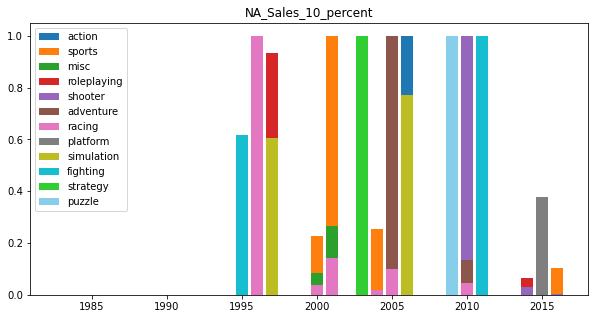

In [42]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.NA_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.NA_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.NA_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.NA_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.NA_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.NA_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.NA_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.NA_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.NA_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.NA_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.NA_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.NA_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('NA_Sales_10_percent')
plt.show()

### EU 지역

In [36]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['EU_Sales']])
action_grouped['EU_SCALE'] = scaler.transform(action_grouped[['EU_Sales']])

#Sports
scaler.fit(sports_grouped[['EU_Sales']])
sports_grouped['EU_SCALE'] = scaler.transform(sports_grouped[['EU_Sales']])

#Misc
scaler.fit(misc_grouped[['EU_Sales']])
misc_grouped['EU_SCALE'] = scaler.transform(misc_grouped[['EU_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['EU_Sales']])
roleplaying_grouped['EU_SCALE'] = scaler.transform(roleplaying_grouped[['EU_Sales']])

#Shooter
scaler.fit(shooter_grouped[['EU_Sales']])
shooter_grouped['EU_SCALE'] = scaler.transform(shooter_grouped[['EU_Sales']])

#Adventure
scaler.fit(adventure_grouped[['EU_Sales']])
adventure_grouped['EU_SCALE'] = scaler.transform(adventure_grouped[['EU_Sales']])

#Racing
scaler.fit(racing_grouped[['EU_Sales']])
racing_grouped['EU_SCALE'] = scaler.transform(racing_grouped[['EU_Sales']])

#Platform
scaler.fit(platform_grouped[['EU_Sales']])
platform_grouped['EU_SCALE'] = scaler.transform(platform_grouped[['EU_Sales']])

#Simulation
scaler.fit(simulation_grouped[['EU_Sales']])
simulation_grouped['EU_SCALE'] = scaler.transform(simulation_grouped[['EU_Sales']])

#Fighting
scaler.fit(fighting_grouped[['EU_Sales']])
fighting_grouped['EU_SCALE'] = scaler.transform(fighting_grouped[['EU_Sales']])

#Strategy
scaler.fit(strategy_grouped[['EU_Sales']])
strategy_grouped['EU_SCALE'] = scaler.transform(strategy_grouped[['EU_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['EU_Sales']])
puzzle_grouped['EU_SCALE'] = scaler.transform(puzzle_grouped[['EU_Sales']])

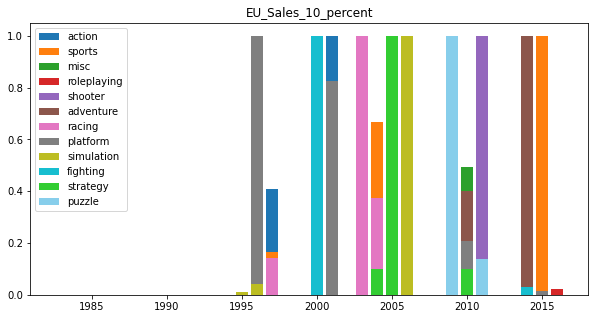

In [43]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.EU_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.EU_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.EU_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.EU_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.EU_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.EU_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.EU_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.EU_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.EU_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.EU_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.EU_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.EU_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('EU_Sales_10_percent')
plt.show()

### JP 지역

In [38]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['JP_Sales']])
action_grouped['JP_SCALE'] = scaler.transform(action_grouped[['JP_Sales']])

#Sports
scaler.fit(sports_grouped[['JP_Sales']])
sports_grouped['JP_SCALE'] = scaler.transform(sports_grouped[['JP_Sales']])

#Misc
scaler.fit(misc_grouped[['JP_Sales']])
misc_grouped['JP_SCALE'] = scaler.transform(misc_grouped[['JP_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['JP_Sales']])
roleplaying_grouped['JP_SCALE'] = scaler.transform(roleplaying_grouped[['JP_Sales']])

#Shooter
scaler.fit(shooter_grouped[['JP_Sales']])
shooter_grouped['JP_SCALE'] = scaler.transform(shooter_grouped[['JP_Sales']])

#Adventure
scaler.fit(adventure_grouped[['JP_Sales']])
adventure_grouped['JP_SCALE'] = scaler.transform(adventure_grouped[['JP_Sales']])

#Racing
scaler.fit(racing_grouped[['JP_Sales']])
racing_grouped['JP_SCALE'] = scaler.transform(racing_grouped[['JP_Sales']])

#Platform
scaler.fit(platform_grouped[['JP_Sales']])
platform_grouped['JP_SCALE'] = scaler.transform(platform_grouped[['JP_Sales']])

#Simulation
scaler.fit(simulation_grouped[['JP_Sales']])
simulation_grouped['JP_SCALE'] = scaler.transform(simulation_grouped[['JP_Sales']])

#Fighting
scaler.fit(fighting_grouped[['JP_Sales']])
fighting_grouped['JP_SCALE'] = scaler.transform(fighting_grouped[['JP_Sales']])

#Strategy
scaler.fit(strategy_grouped[['JP_Sales']])
strategy_grouped['JP_SCALE'] = scaler.transform(strategy_grouped[['JP_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['JP_Sales']])
puzzle_grouped['JP_SCALE'] = scaler.transform(puzzle_grouped[['JP_Sales']])

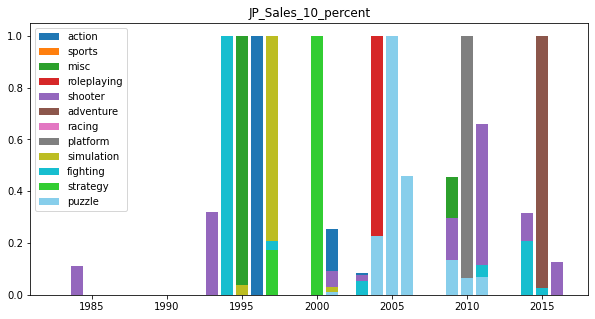

In [44]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.JP_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.JP_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.JP_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.JP_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.JP_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.JP_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.JP_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.JP_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.JP_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.JP_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.JP_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.JP_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('JP_Sales_10_percent')
plt.show()

### Other 지역

In [40]:
# ['Action', 'Sports', 'Misc', 'RolePlaying', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
scaler = MinMaxScaler()
# Action
scaler.fit(action_grouped[['Other_Sales']])
action_grouped['Other_SCALE'] = scaler.transform(action_grouped[['Other_Sales']])

#Sports
scaler.fit(sports_grouped[['Other_Sales']])
sports_grouped['Other_SCALE'] = scaler.transform(sports_grouped[['Other_Sales']])

#Misc
scaler.fit(misc_grouped[['Other_Sales']])
misc_grouped['Other_SCALE'] = scaler.transform(misc_grouped[['Other_Sales']])

#RolePlaying
scaler.fit(roleplaying_grouped[['Other_Sales']])
roleplaying_grouped['Other_SCALE'] = scaler.transform(roleplaying_grouped[['Other_Sales']])

#Shooter
scaler.fit(shooter_grouped[['Other_Sales']])
shooter_grouped['Other_SCALE'] = scaler.transform(shooter_grouped[['Other_Sales']])

#Adventure
scaler.fit(adventure_grouped[['Other_Sales']])
adventure_grouped['Other_SCALE'] = scaler.transform(adventure_grouped[['Other_Sales']])

#Racing
scaler.fit(racing_grouped[['Other_Sales']])
racing_grouped['Other_SCALE'] = scaler.transform(racing_grouped[['Other_Sales']])

#Platform
scaler.fit(platform_grouped[['Other_Sales']])
platform_grouped['Other_SCALE'] = scaler.transform(platform_grouped[['Other_Sales']])

#Simulation
scaler.fit(simulation_grouped[['Other_Sales']])
simulation_grouped['Other_SCALE'] = scaler.transform(simulation_grouped[['Other_Sales']])

#Fighting
scaler.fit(fighting_grouped[['Other_Sales']])
fighting_grouped['Other_SCALE'] = scaler.transform(fighting_grouped[['Other_Sales']])

#Strategy
scaler.fit(strategy_grouped[['Other_Sales']])
strategy_grouped['Other_SCALE'] = scaler.transform(strategy_grouped[['Other_Sales']])

#Puzzle
scaler.fit(puzzle_grouped[['Other_Sales']])
puzzle_grouped['Other_SCALE'] = scaler.transform(puzzle_grouped[['Other_Sales']])

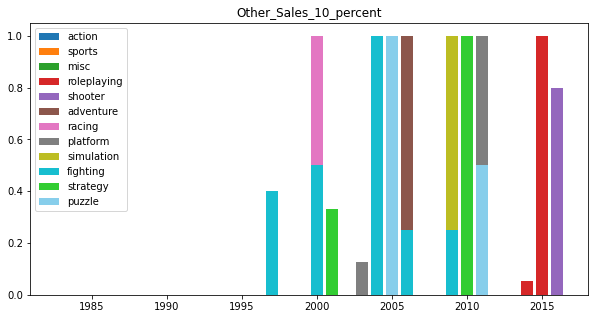

In [45]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

plt.bar(action_grouped.index, action_grouped.Other_SCALE, label = 'action')
plt.bar(sports_grouped.index, sports_grouped.Other_SCALE, label = 'sports')
plt.bar(misc_grouped.index, misc_grouped.Other_SCALE, label = 'misc')
plt.bar(roleplaying_grouped.index, roleplaying_grouped.Other_SCALE, label = 'roleplaying')
plt.bar(shooter_grouped.index, shooter_grouped.Other_SCALE, label = 'shooter')
plt.bar(adventure_grouped.index, adventure_grouped.Other_SCALE, label = 'adventure')
plt.bar(racing_grouped.index, racing_grouped.Other_SCALE, label = 'racing')
plt.bar(platform_grouped.index, platform_grouped.Other_SCALE, label = 'platform')
plt.bar(simulation_grouped.index, simulation_grouped.Other_SCALE, label = 'simulation')
plt.bar(fighting_grouped.index, fighting_grouped.Other_SCALE, label = 'fighting')
plt.bar(strategy_grouped.index, strategy_grouped.Other_SCALE, label = 'strategy', color = 'limegreen')
plt.bar(puzzle_grouped.index, puzzle_grouped.Other_SCALE, label = 'puzzle', color = 'skyblue')


ax.legend(loc = 'upper left')
plt.title('Other_Sales_10_percent')
plt.show()

### 4. 플랫폼 별 주류장르가 차이가 있을것인가?
- 대게 FIFA 17 같은 sports 게임은 PS로 플레이하는 것이 주류를 이룬다. 이에 데이터를 통해 정말로 플랫폼에 따른 장르차이가 있는지 확인하였다.

In [31]:
df_new.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)